#Direcotry, Libraries and Data

In [1]:
%cd /content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Logistic Regression

/content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Logistic Regression


In [2]:
#libraries
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#load the data
df = pd.read_csv("titanic.csv")
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


#Data Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6268c8aa90>,
      dtype=object)

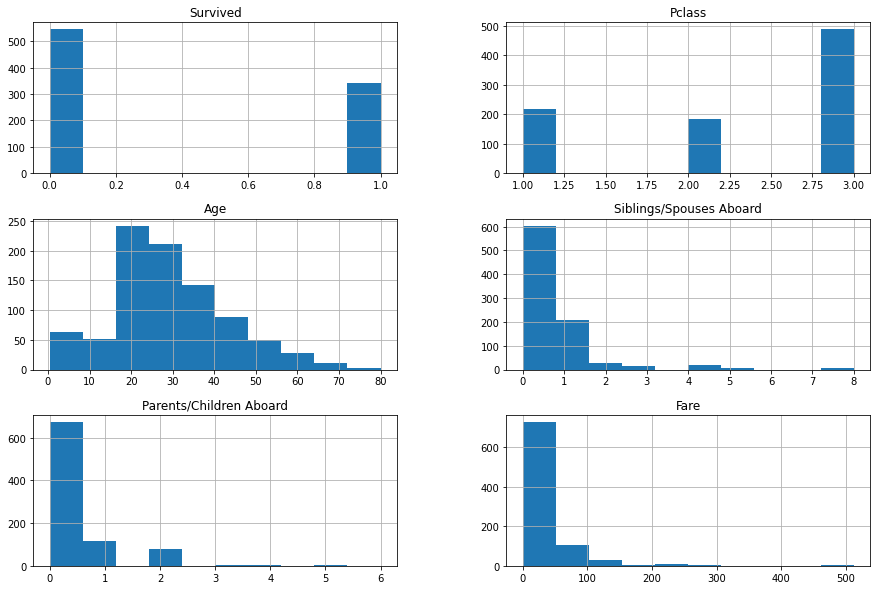

In [4]:
#Histograms
df.hist(figsize= (15, 10))

In [5]:
#Drop name variable
df = df.drop(columns = "Name")
df.head(1)

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,22.0,1,0,7.25


In [6]:
#Transform character variables
df = pd.get_dummies(data = df, drop_first=True)

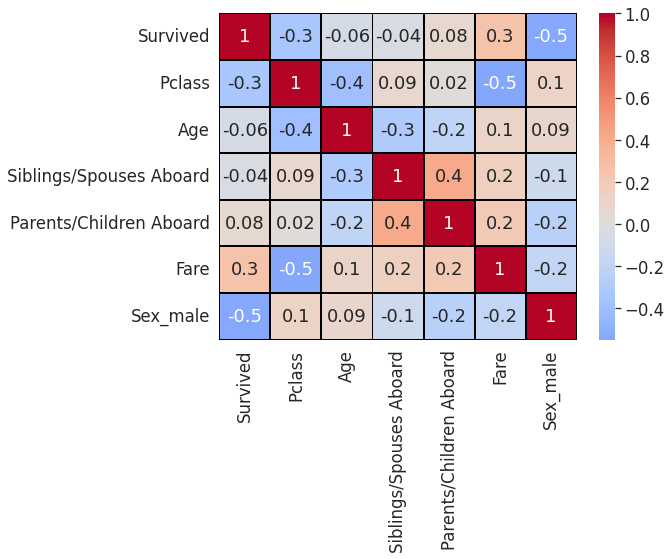

In [8]:
#Correlation matrix
plt.figure(figsize = (8,6))
sns.set(font_scale=1.5)
sns.heatmap(df.corr(),
            annot = True,
            fmt = '.1g',
            center = 0,
            cmap = 'coolwarm',
            linewidths = 1,
            linecolor = 'black')

#Logistic Regression preparation

In [9]:
df.head(0)

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_male


In [10]:
#Prepare X and Y
y = df.Survived
X = df.drop(columns = "Survived")
X = sm.add_constant(X)

In [11]:
#Training and Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 1502)

#Logistic Regression and Assessment

In [12]:
#Logistic Regression
model = sm.Logit(y_train, X_train).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.405125
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  709
Model:                          Logit   Df Residuals:                      702
Method:                           MLE   Df Model:                            6
Date:                Mon, 29 Nov 2021   Pseudo R-squ.:                  0.3915
Time:                        09:49:40   Log-Likelihood:                -287.23
converged:                       True   LL-Null:                       -472.06
Covariance Type:            nonrobust   LLR p-value:                 9.247e-77
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       6.2418      0.686      9.101      0.000       4.898   

In [14]:
#predictions
predictions = model.predict(X_test)
predictions = np.where(predictions > 0.5, 1, 0)
predictions[:4]

array([1, 0, 0, 1])

In [15]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77       108
           1       0.65      0.63      0.64        70

    accuracy                           0.72       178
   macro avg       0.71      0.70      0.70       178
weighted avg       0.72      0.72      0.72       178

